<a href="https://colab.research.google.com/github/HRVargiya-2000s/DS-Practical/blob/main/Practical_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1 - Load Data
   CustomerID  Gender  Age  Income  Churn
0           1    Male   32   50000      0
1           2  Female   28   35000      0
2           3    Male   45   48000      1
3           4    Male   38   60000      1
4           5  Female   20   20000      1
5           6  Female   55   75000      0
6           7    Male   42   49000      0
7           8  Female   29   40000      1

2 - Preprocess Data (Encode Gender)
   CustomerID  Gender  Age  Income  Churn
0           1       1   32   50000      0
1           2       0   28   35000      0
2           3       1   45   48000      1
3           4       1   38   60000      1
4           5       0   20   20000      1
5           6       0   55   75000      0
6           7       1   42   49000      0
7           8       0   29   40000      1

3 - Split Data: Features/Target
Features:
    Gender  Age  Income
0       1   32   50000
1       0   28   35000
2       1   45   48000
3       1   38   60000
4       0   20   20000
5       0 

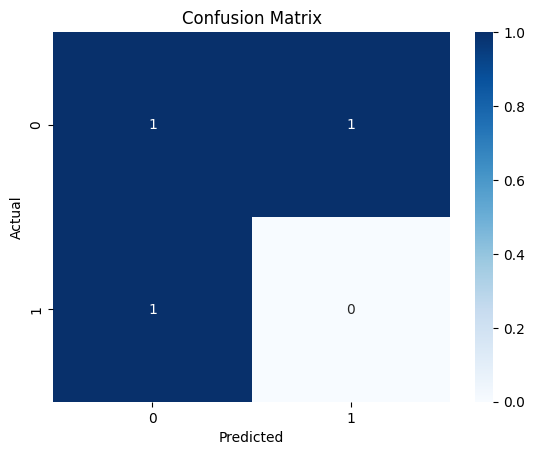

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("\n1 - Load Data")
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8],
    'Gender': ['Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female'],
    'Age': [32, 28, 45, 38, 20, 55, 42, 29],
    'Income': [50000, 35000, 48000, 60000, 20000, 75000, 49000, 40000],
    'Churn': [0, 0, 1, 1, 1, 0, 0, 1]
}
df = pd.DataFrame(data)
print(df)

print("\n2 - Preprocess Data (Encode Gender)")
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
print(df)

print("\n3 - Split Data: Features/Target")
X = df[['Gender', 'Age', 'Income']]
y = df['Churn']
print("Features:\n", X)
print("Target:\n", y)

print("\n4 - Split into Train/Test Sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Train Features:\n", X_train)
print("Test Features:\n", X_test)

print("\n5 - Scale Features")
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\n6 - Train Logistic Regression Model")
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Model trained.")

print("\n7 - Predict and Evaluate")
y_pred = model.predict(X_test)
print("Predicted:", y_pred)
print("Actual   :", list(y_test))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\n8 - Plot Confusion Matrix")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
